**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

**Load Dataset & Display intial rows**

In [ ]:
df = pd.read_csv("/content/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Display basic info**

In [ ]:
df_RS = df[['Restaurant ID','Restaurant Name','Cuisines','Aggregate rating','Votes']]
df_RS

,Restaurant ID,Restaurant Name,Cuisines,Aggregate rating,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",4.8,314
1,6304287,Izakaya Kikufuji,Japanese,4.5,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4.4,270
3,6318506,Ooma,"Japanese, Sushi",4.9,365
4,6314302,Sambo Kojin,"Japanese, Korean",4.8,229
...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,Turkish,4.1,788
9547,5908749,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",4.2,1034
9548,5915807,Huqqa,"Italian, World Cuisine",3.7,661
9549,5916112,A���k Kahve,Restaurant Cafe,4.0,901


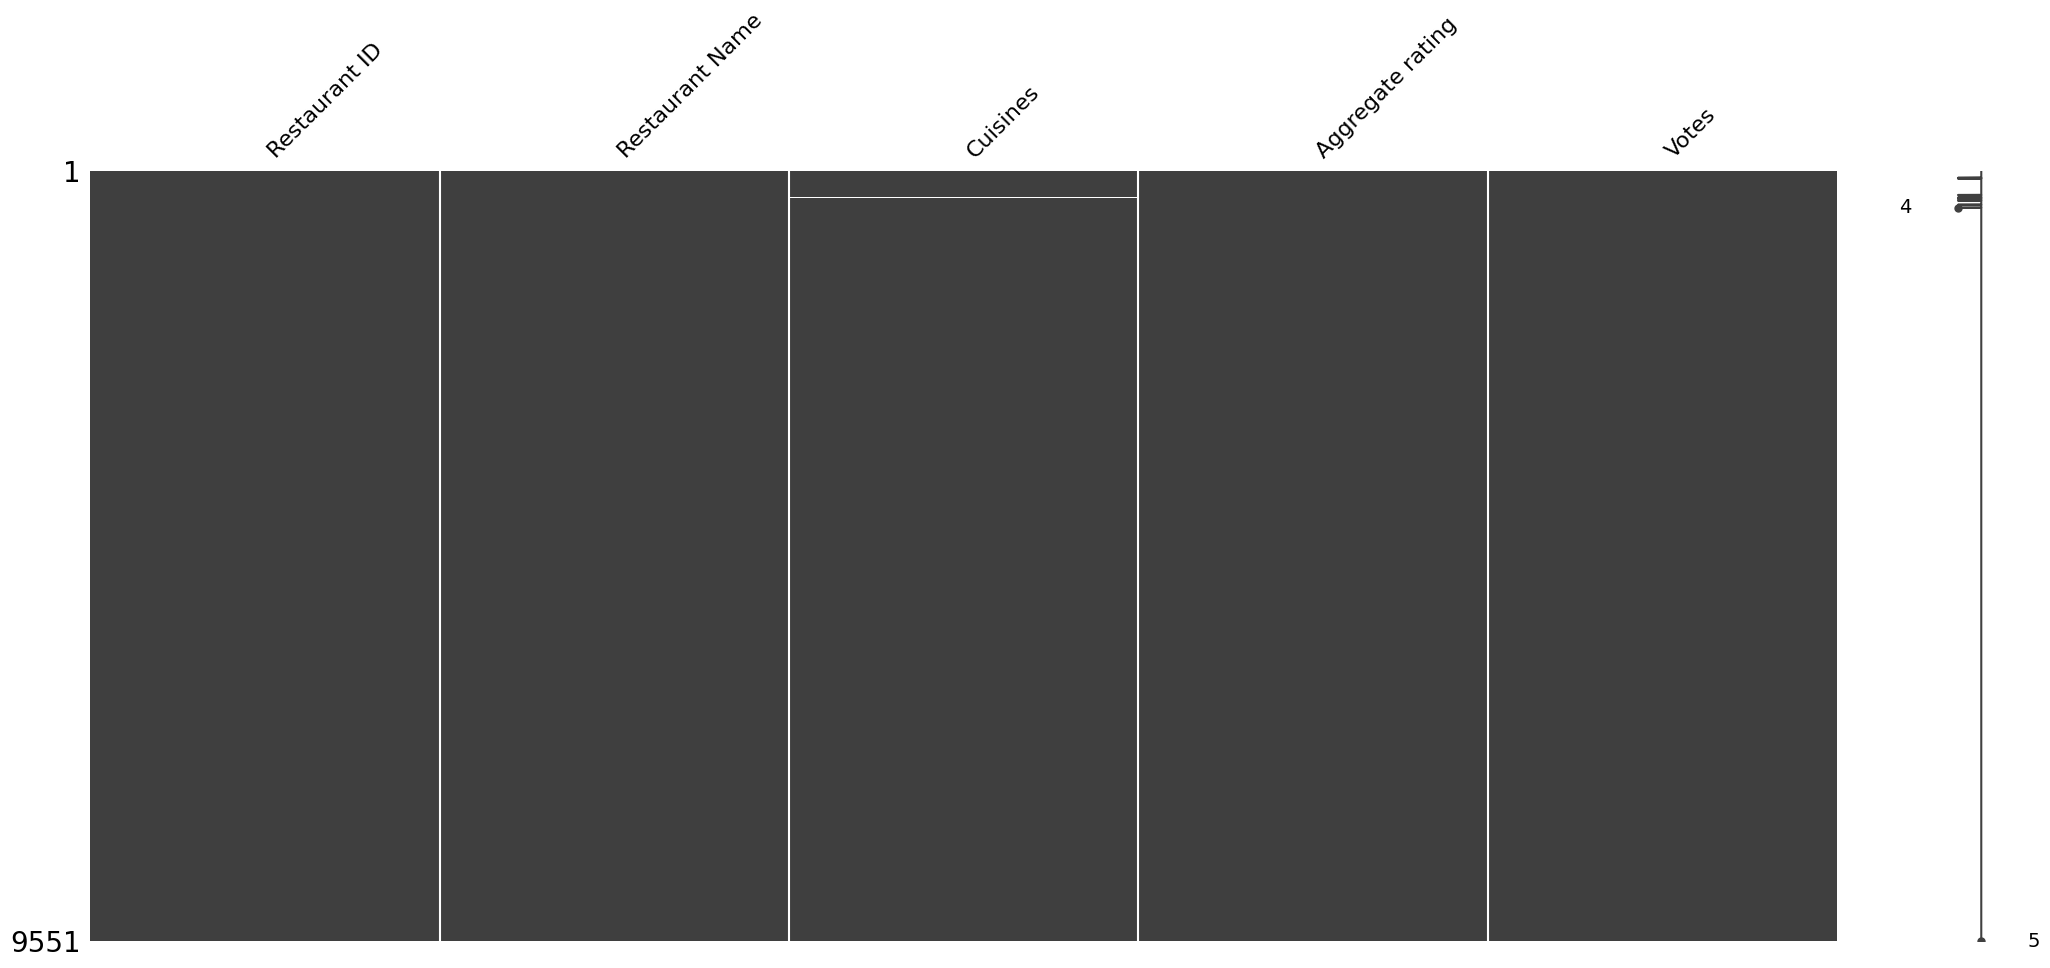

In [ ]:
import missingno as msno
msno.matrix(df_RS)
plt.show()

**Data Cleaning**

In [ ]:
def dataDesc():
    listItem = []
    for col in df_RS.columns :
        listItem.append(
            [col,
            df_RS[col].dtype,
            df_RS[col].isna().sum(),
            round(df_RS[col].isna().sum()/len(df_RS)*100,2),
            df_RS[col].nunique(),
            list(df_RS[col].drop_duplicates().sample(2).values)]
        )
    descData = pd.DataFrame(data = listItem,
                            columns = ['Column','Data Type', 'Missing Value',
                                        'Pct Missing Value', 'Num Unique', 'Unique Sample'])
    return descData

dataDesc()

,Column,Data Type,Missing Value,Pct Missing Value,Num Unique,Unique Sample
0,Restaurant ID,int64,0,0.00,9551,"[6025, 18358700]"
1,Restaurant Name,object,0,0.00,7446,"[Sea Lord, Nature Hut Cafe]"
2,Cuisines,object,9,0.09,1825,"[North Indian, Mughlai, South Indian, Rajastha..."
3,Aggregate rating,float64,0,0.00,33,"[3.9, 2.1]"
4,Votes,int64,0,0.00,1012,"[1056, 449]"


In [ ]:
df_RS = df_RS.dropna()
df_RS

,Restaurant ID,Restaurant Name,Cuisines,Aggregate rating,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",4.8,314
1,6304287,Izakaya Kikufuji,Japanese,4.5,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4.4,270
3,6318506,Ooma,"Japanese, Sushi",4.9,365
4,6314302,Sambo Kojin,"Japanese, Korean",4.8,229
...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,Turkish,4.1,788
9547,5908749,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",4.2,1034
9548,5915807,Huqqa,"Italian, World Cuisine",3.7,661
9549,5916112,A���k Kahve,Restaurant Cafe,4.0,901


**Columns Renaming**

In [ ]:
df_RS = df_RS.rename(columns={'Restaurant ID': 'restaurant_id'})
df_RS = df_RS.rename(columns={'Restaurant Name': 'restaurant_name'})
df_RS = df_RS.rename(columns={'Cuisines': 'cuisines'})
df_RS = df_RS.rename(columns={'Aggregate rating': 'aggregate_rating'})
df_RS = df_RS.rename(columns={'Votes': 'votes'})

In [ ]:
df_RS

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",4.8,314
1,6304287,Izakaya Kikufuji,Japanese,4.5,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4.4,270
3,6318506,Ooma,"Japanese, Sushi",4.9,365
4,6314302,Sambo Kojin,"Japanese, Korean",4.8,229
...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,Turkish,4.1,788
9547,5908749,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",4.2,1034
9548,5915807,Huqqa,"Italian, World Cuisine",3.7,661
9549,5916112,A���k Kahve,Restaurant Cafe,4.0,901


**Check for Duplicates**

In [ ]:
df_RS.duplicated().sum()

0

In [ ]:
df_RS['restaurant_name'].duplicated().sum()

2105

In [ ]:
df_RS['restaurant_name'].value_counts()

,count
restaurant_name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
...,...
The Town House Cafe,1
The G.T. Road,1
The Darzi Bar & Kitchen,1


In [ ]:
df_RS = df_RS.sort_values(by=['restaurant_name','aggregate_rating'],ascending=False)

In [ ]:
df_RS[df_RS['restaurant_name']=="Subway"].head()

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
3583,306031,Subway,"American, Fast Food, Salad, Healthy Food",3.8,97
8455,1070,Subway,"American, Fast Food, Salad, Healthy Food",3.8,268
4658,154,Subway,"American, Fast Food, Salad, Healthy Food",3.7,188
3246,312586,Subway,"American, Fast Food, Salad, Healthy Food",3.6,84
4615,306403,Subway,"American, Fast Food, Salad, Healthy Food",3.6,118


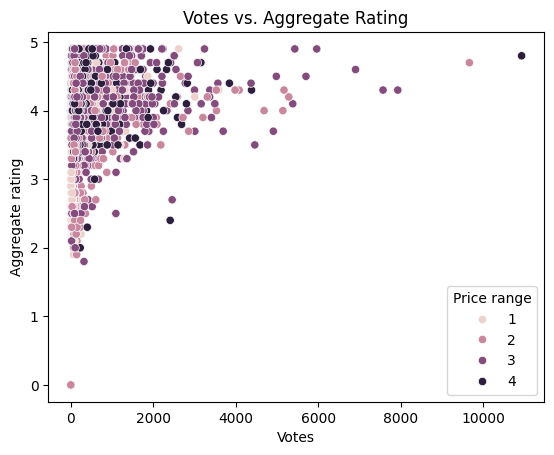

In [ ]:
sns.scatterplot(x=df['Votes'], y=df['Aggregate rating'], hue=df['Price range'])
plt.title("Votes vs. Aggregate Rating")
plt.show()

**Dropping duplicaes only keeping first Value.**

In [ ]:
df_RS = df_RS.drop_duplicates('restaurant_name',keep='first')
df_RS

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
9523,6000871,�ukura��a Sofras۱,"Kebab, Izgara",4.4,296
3120,18222559,{Niche} - Cafe & Bar,"North Indian, Chinese, Italian, Continental",4.1,492
9334,7100938,wagamama,"Japanese, Asian",3.7,131
9454,6401789,tashas,"Cafe, Mediterranean",4.1,374
4659,18361747,t Lounge by Dilmah,"Cafe, Tea, Desserts",3.6,34
...,...,...,...,...,...
8692,18317511,#Urban Caf��,"North Indian, Chinese, Italian",3.3,49
6998,18336489,#OFF Campus,"Cafe, Continental, Italian, Fast Food",3.7,216
2613,18311951,#InstaFreeze,Ice Cream,0.0,2
9148,18378803,#Dilliwaala6,North Indian,3.7,124


In [ ]:
df_RS['restaurant_name'].value_counts()

,count
restaurant_name,
�ukura��a Sofras۱,1
French Toast,1
Fourteen Eleven Tea Cafe,1
Fozzie's Pizzaiolo,1
Frasers,1
...,...
Pizza Street,1
Pizza Treat,1
Pizza Yum,1


In [ ]:
df_RS = df_RS[df_RS['aggregate_rating']>=4.0]
df_RS

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
9523,6000871,�ukura��a Sofras۱,"Kebab, Izgara",4.4,296
3120,18222559,{Niche} - Cafe & Bar,"North Indian, Chinese, Italian, Continental",4.1,492
9454,6401789,tashas,"Cafe, Mediterranean",4.1,374
9385,6113857,sketch Gallery,"British, Contemporary",4.5,148
1837,18418247,feel ALIVE,"North Indian, American, Asian, Biryani",4.7,69
...,...,...,...,...,...
1468,18408054,19 Flavours Biryani,"Mughlai, Hyderabadi",4.1,84
2484,18233317,145 Kala Ghoda,"Fast Food, Beverages, Desserts",4.2,1606
2292,2100784,11th Avenue Cafe Bistro,"Cafe, American, Italian, Continental",4.1,377
751,2600031,10 Downing Street,"North Indian, Chinese",4.0,257


**Split Cuisines into list**

In [ ]:
df_RS['cuisines'] = df_RS['cuisines'].str.split(', ')
df_RS

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
9523,6000871,�ukura��a Sofras۱,"[Kebab, Izgara]",4.4,296
3120,18222559,{Niche} - Cafe & Bar,"[North Indian, Chinese, Italian, Continental]",4.1,492
9454,6401789,tashas,"[Cafe, Mediterranean]",4.1,374
9385,6113857,sketch Gallery,"[British, Contemporary]",4.5,148
1837,18418247,feel ALIVE,"[North Indian, American, Asian, Biryani]",4.7,69
...,...,...,...,...,...
1468,18408054,19 Flavours Biryani,"[Mughlai, Hyderabadi]",4.1,84
2484,18233317,145 Kala Ghoda,"[Fast Food, Beverages, Desserts]",4.2,1606
2292,2100784,11th Avenue Cafe Bistro,"[Cafe, American, Italian, Continental]",4.1,377
751,2600031,10 Downing Street,"[North Indian, Chinese]",4.0,257


**Exploding cuisines**

In [ ]:
df_RS = df_RS.explode('cuisines')
df_RS

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
9523,6000871,�ukura��a Sofras۱,Kebab,4.4,296
9523,6000871,�ukura��a Sofras۱,Izgara,4.4,296
3120,18222559,{Niche} - Cafe & Bar,North Indian,4.1,492
3120,18222559,{Niche} - Cafe & Bar,Chinese,4.1,492
3120,18222559,{Niche} - Cafe & Bar,Italian,4.1,492
...,...,...,...,...,...
2292,2100784,11th Avenue Cafe Bistro,Italian,4.1,377
2292,2100784,11th Avenue Cafe Bistro,Continental,4.1,377
751,2600031,10 Downing Street,North Indian,4.0,257
751,2600031,10 Downing Street,Chinese,4.0,257


In [ ]:
df_RS['cuisines'].value_counts()

,count
cuisines,
North Indian,270
Italian,237
Chinese,200
Continental,199
Cafe,177
...,...
Pub Food,1
Durban,1
Irish,1


**Cross Tabulate Restaurant Name and Cuisines**

In [ ]:
xTabu_Resto_Cuisines = pd.crosstab(df_RS['restaurant_name'],
                                df_RS['cuisines'])
xTabu_Resto_Cuisines

cuisines,Afghani,African,American,Andhra,Arabian,Argentine,Asian,Asian Fusion,Australian,Awadhi,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
restaurant_name,,,,,,,,,,,,,,,,,,,,,
'Ohana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Downing Street,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11th Avenue Cafe Bistro,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145 Kala Ghoda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19 Flavours Biryani,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feel ALIVE,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sketch Gallery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tashas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Checking on restaurant name value**

In [ ]:
xTabu_Resto_Cuisines.loc['feel ALIVE'].values

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Resto Names Sample**

In [ ]:
df_RS['restaurant_name'].sample(20, random_state=101)

,restaurant_name
439,Mrs. Wilkes' Dining Room
9545,Baltazar
6921,Rose Cafe
108,Big City Bread Cafe
2311,Olive Bistro
120,Transmetropolitan
4387,Maxims Pastry Shop
9222,Meraki
9359,Mimi's Bakehouse
2438,Cappuccino Blast


In [ ]:
#Similarity
print(jaccard_score(xTabu_Resto_Cuisines.loc["Olive Bistro"].values,
                    xTabu_Resto_Cuisines.loc["Rose Cafe"].values))

0.3333333333333333


**Create Similarity Value DF**

In [ ]:
from scipy.spatial.distance import pdist, squareform

jaccard_Dist = pdist(xTabu_Resto_Cuisines.values, metric='jaccard')
jaccard_Matrix = squareform(jaccard_Dist)
jaccard_Sim = 1 - jaccard_Matrix
dfJaccard = pd.DataFrame(
    jaccard_Sim,
    index=xTabu_Resto_Cuisines.index,
    columns=xTabu_Resto_Cuisines.index)

dfJaccard

restaurant_name,'Ohana,10 Downing Street,11th Avenue Cafe Bistro,145 Kala Ghoda,19 Flavours Biryani,1918 Bistro & Grill,2 Dog,22nd Parallel,3 Wise Monkeys,38 Barracks,...,Zoeys Pizzeria,Zolocrust - Hotel Clarks Amer,Zombie Burger + Drink Lab,Zuka Choco-la,Zunzi's,feel ALIVE,sketch Gallery,tashas,{Niche} - Cafe & Bar,�ukura��a Sofras۱
restaurant_name,,,,,,,,,,,,,,,,,,,,,
'Ohana,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0
10 Downing Street,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.200000,...,0.0,0.0,0.0,0.000000,0.00,0.200000,0.0,0.0,0.500000,0.0
11th Avenue Cafe Bistro,0.0,0.0,1.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.333333,...,0.0,0.4,0.0,0.000000,0.00,0.142857,0.0,0.2,0.333333,0.0
145 Kala Ghoda,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.2,0.333333,0.00,0.000000,0.0,0.0,0.000000,0.0
19 Flavours Biryani,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feel ALIVE,0.0,0.2,0.142857,0.0,0.0,0.0,0.166667,0.0,0.0,0.600000,...,0.0,0.0,0.0,0.000000,0.00,1.000000,0.0,0.0,0.142857,0.0
sketch Gallery,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00,0.000000,1.0,0.0,0.000000,0.0
tashas,0.0,0.0,0.200000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.25,0.000000,0.0,1.0,0.000000,0.0


**Sample restaurants name**

In [ ]:
df_RS['restaurant_name'].sample(20)

,restaurant_name
4176,Cool Point
228,Pie Slingers Pizzeria
146,Flatbread Neapolitan Pizzeria
369,The Ravenous Pig
388,Native Cafe
3768,Baris
8603,Teasta
9519,Masaba��۱ Kebap�_۱s۱
2111,Bernardo's
500,The Moon Under Water


**Final Recommendation System**

In [ ]:
resto = 'Ooma'
sim = dfJaccard.loc[resto].sort_values(ascending=False)
sim = pd.DataFrame({'restaurant_name': sim.index, 'simScore': sim.values})
sim = sim[(sim['restaurant_name']!= resto) & (sim['simScore']>=0.7)].head(5)

# Merge The Rating
RestoRec = pd.merge(sim,df_RS[['restaurant_name','aggregate_rating']],how='inner',on='restaurant_name')
FinalRestoRec = RestoRec.sort_values('aggregate_rating',ascending=False).drop_duplicates('restaurant_name',keep='first')
FinalRestoRec

,restaurant_name,simScore,aggregate_rating
0,Sushi Masa,1.0,4.9
2,Nobu,1.0,4.4
4,Ichiban,1.0,4.3
8,Osaka,1.0,4.2
6,Guppy,1.0,4.1


**Conclusion**
:- The data presented highlights the top five recommended restaurants with the highest ratings. Only establishments with a rating of 4 or above are considered, ensuring that the recommendation system objectively suggests well-rated options for a quality dining experience.